In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
base_folder = 'D:/REPOS/LeanSTP/Tests/TestData/'
spy = pd.read_csv(base_folder + 'spy_10_min.txt', index_col=0, parse_dates=True)

In [3]:
from pyti.moving_average_convergence_divergence import moving_average_convergence_divergence as macd

In [5]:
spy['MACD'] = macd(spy.Close, 12, 26)

In [6]:
spy.to_csv(base_folder + 'spy_macd_12_26.csv')

In [7]:
# Jared's external testing data
macd_alt = pd.read_csv(base_folder + 'macd-12-26-9-ema.txt', index_col=0, parse_dates=True)

In [8]:
macd_alt['pyti_macd'] = macd(macd_alt.Close, 12, 26)

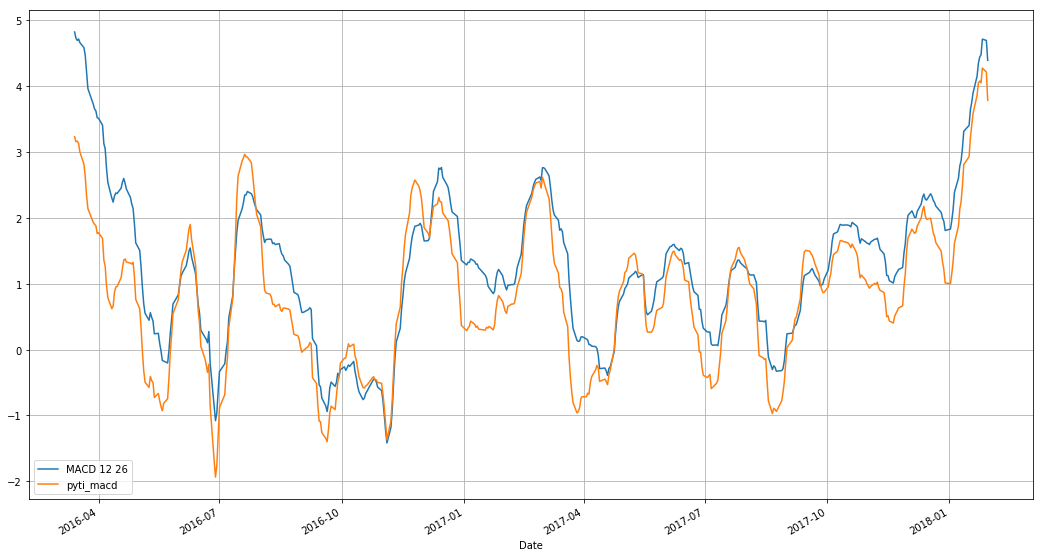

In [9]:
macd_alt.get(['MACD 12 26', 'pyti_macd']).plot(figsize=(18, 10), grid=True)

In [48]:
macd_alt['pandas_MACD'] = (macd_alt.Close.ewm(span=12,min_periods=12,adjust=True).mean() - 
                           macd_alt.Close.ewm(span=26,min_periods=26,adjust=True).mean())

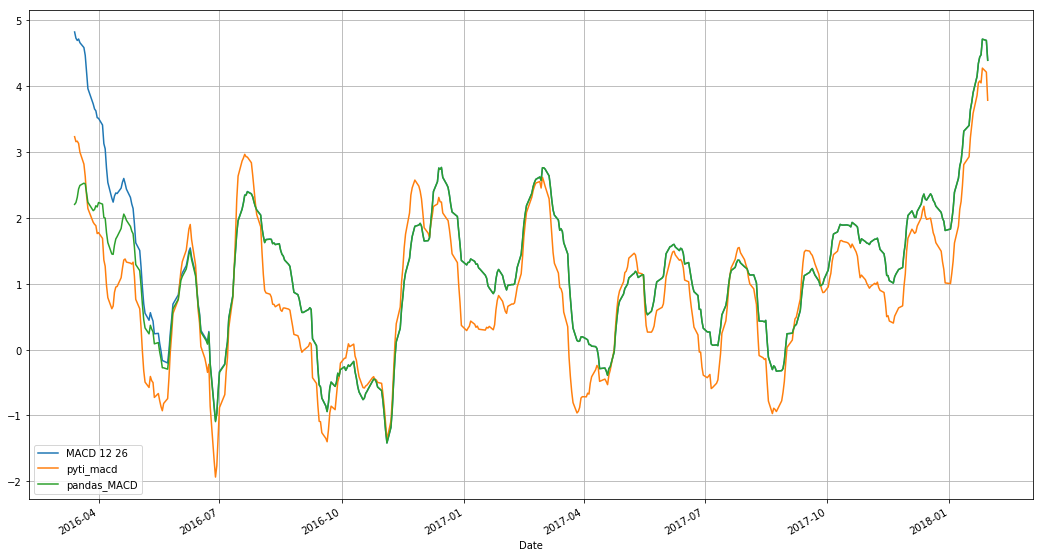

In [49]:
macd_alt.get(['MACD 12 26', 'pyti_macd', 'pandas_MACD']).plot(figsize=(18, 10), grid=True)

Just in case, check Lean's EMA, even when **I know** is rigth, the test compares the indicator against the formula.

In [39]:
leans_EMA = pd.read_csv(base_folder + 'spy_with_indicators.txt', index_col=0, parse_dates=True)
leans_EMA.head()

,SMA14,EMA14,MACD 12 26,RSI 14,OBV,Close
Date,,,,,,
2013-01-09,NaN,NaN,NaN,NaN,NaN,13390.51
2013-01-10,NaN,NaN,NaN,NaN,256585200.0,13471.22
2013-01-11,NaN,NaN,NaN,NaN,375788200.0,13488.43
2013-01-14,NaN,NaN,NaN,NaN,494240600.0,13507.32
2013-01-15,NaN,NaN,NaN,NaN,596510100.0,13534.89


In [43]:
leans_EMA['pandas_EMA'] = leans_EMA.Close.ewm(span=14,min_periods=14, adjust=False).mean()

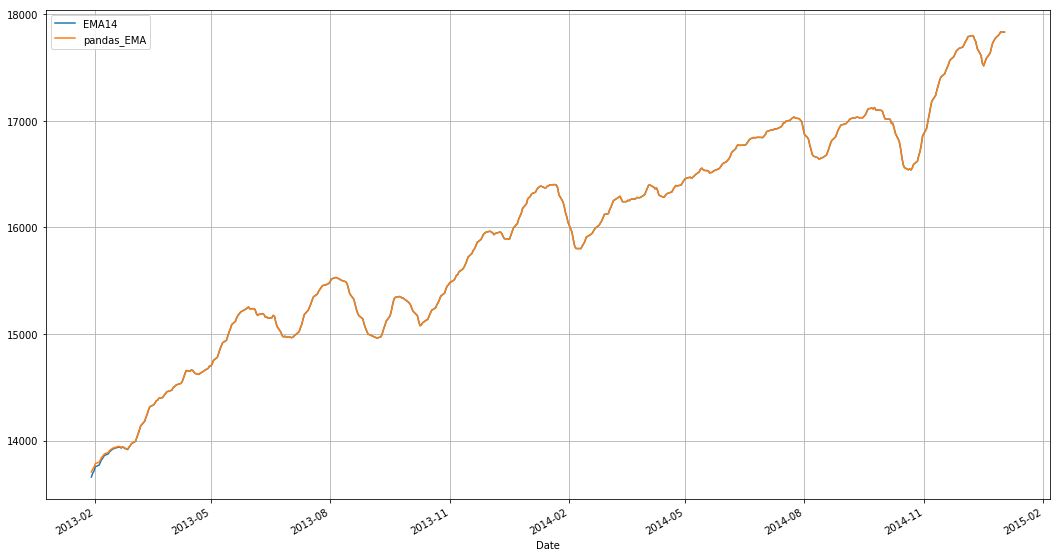

In [44]:
leans_EMA.get(['EMA14', 'pandas_EMA']).plot(figsize=(18, 10), grid=True)

In [50]:
macd_alt.get(['Close', 'pandas_MACD']).to_csv(base_folder + 'pandas_MACD.csv')

In [47]:
macd_alt.get(['Close', 'pandas_MACD'])

,Close,pandas_MACD
Date,,
2016-02-05,187.95,NaN
2016-02-08,185.42,NaN
2016-02-09,185.43,NaN
2016-02-10,185.27,NaN
2016-02-11,182.86,NaN
2016-02-12,186.63,NaN
2016-02-16,189.78,NaN
2016-02-17,192.88,NaN
2016-02-18,192.09,NaN
